Đề bài 1:

**Problem Statement:**

Một công ty ô tô Trung Quốc Geely Auto muốn thâm nhập thị trường Mỹ bằng cách thành lập đơn vị sản xuất của họ ở đó và sản xuất ô tô đểcạnh tranh với các đối tác Mỹ và châu Âu.

Do vậy, họ đã ký hợp đồng với một công ty tư vấn ô tô để hiểu các yếu tố ảnh hưởng đến việc định giá ô tô tại thị trường Mỹ, vì những yếu tố đó có thể rất khác so với thị trường Trung Quốc.

Cụ thể, họ muốn biết:

➔ Đâu là những yếu tố quan trọng để định giá ô tô?

➔ Các thông số nào của ô tô sẽ ảnh hưởng đến giá của chiếc ô tô đó?

**Business Goal:**

Bạn được yêu cầu xây dựng một mô hình giá ô tô với các features trong tập dữ liệu. Nó sẽ được team Product sử dụng để hiểu chính xác mức giá thay đổi như thế nào với các features đó. Theo đó, họ có thể đưa ra các phương án thiết kế của ô tô, chiến lược kinh doanh, v.v. để đáp ứng với từng phân khúc giá nhất định. Hơn nữa, mô hình này sẽ là một cách tốt để BOD hiểu được cách định giá của một thị trường mới.

Phân tích đặc điểm theo các phân khúc xe và khách hàng và các phần xử lý dữ liệu


2. Data Visualization
3. Feature Engineering
4. Data Preprocessing
* Encoding
* Spiting Data
* Scaling Data
5. Building Models
* Linear Regression
* Decision Tree
* Random Forest
* K nearest neighbors

# CAR PRICE DATA DICTIONARY
- Car_ID  | ID duy nhất của mỗi mẫu quan sát (Số nguyên)
- Symboling | Xếp hạng rủi ro bảo hiểm được chỉ định, Giá trị +3 cho biết ô tô có rủi ro, -3 cho biết nó có thể khá an toàn. (Theo nhóm)
- carCompany | Tên hãng xe (Theo nhóm)
- fueltype | Loại nhiên liệu của xe (ví dụ xăng hoặc dầu diesel) (Theo nhóm)
- aspiration | Loại hút khí được sử dụng trong xe (Theo nhóm)
- doornumber | Số cửa trên xe (Theo nhóm)
- carbody | Thân xe (Theo nhóm)
- drivewheel | Loại bánh lái (Theo nhóm)
- enginelocation | Vị trí động cơ xe (Theo nhóm)
- wheelbase | Chiều dài cơ sở của xe (Số)
- carlength | Chiều dài xe (Số)
- carwidth | Chiều rộng xe (Số)
- carheight | Chiều cao xe (Số)
- curbweight | Trọng lượng của xe không có người hoặc hành lý. (Số)
- enginetype | Loại động cơ. (Theo nhóm)
- cylindernumber | Số xi-lanh đặt trong xe (Theo nhóm)
- enginesize | Dung tích động cơ (Số)
- fuelsystem | Hệ thống nhiên liệu của xe (Theo nhóm)
- boreratio | Tỷ lệ đường kính xi-lanh (Số)
- stroke | Hành trình hoặc thể tích bên trong động cơ (Số)
- compressionratio | Tỷ số nén của động cơ (Số)
- horsepower | Công suất (Số)
- peakrpm | Vòng tua máy tối đa (Số)
- citympg | Mức tiêu thụ nhiên liệu trong thành phố (Số)
- highwaympg | Mức tiêu thụ nhiên liệu trên đường cao tốc (Số)
- price(Dependent variable) | Giá xe (Số)

#  Import thư viện

In [ ]:
import numpy as np# Thư viện tính toán
import pandas as pd #Thư việ đọc, sử lý số liệu
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
#plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

# 1. Reading and understanding the data

In [ ]:
# Link share google drive của dữ liệu
link='https://drive.google.com/file/d/1A9HiORshmuM-ANHejaDAWgFcnJwc-_LZ/view?usp=drive_link'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,886.0,...,130,mpfi,347.0,268.0,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,886.0,...,130,mpfi,347.0,268.0,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,945.0,...,152,mpfi,268.0,347.0,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,998.0,...,109,mpfi,319.0,34.0,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,994.0,...,136,mpfi,319.0,34.0,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,1091.0,...,141,mpfi,378.0,315.0,95.0,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,1091.0,...,141,mpfi,378.0,315.0,87.0,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,1091.0,...,173,mpfi,358.0,287.0,88.0,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,1091.0,...,145,idi,301.0,34.0,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,1091.0,...,141,mpfi,378.0,315.0,95.0,114,5400,19,25,22625.0


In [ ]:
df.shape

(205, 26)

In [ ]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,103.000000,0.834146,923.687805,1597.502439,616.185366,491.195122,2555.565854,126.907317,316.863415,329.492683,74.565854,104.117073,5125.121951,25.219512,30.751220,1.024690e+05
std,59.322565,1.245307,229.283389,471.805207,156.566608,146.569969,520.680204,41.642693,68.658153,429.105243,99.368850,39.544167,476.985643,6.542142,6.886443,1.246484e+06
min,1.000000,-2.000000,93.000000,150.000000,64.000000,51.000000,1488.000000,61.000000,35.000000,28.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000e+03
25%,52.000000,0.000000,945.000000,1624.000000,638.000000,508.000000,2145.000000,97.000000,305.000000,268.000000,9.000000,70.000000,4800.000000,19.000000,25.000000,7.788000e+03
50%,103.000000,1.000000,963.000000,1724.000000,654.000000,541.000000,2414.000000,120.000000,327.000000,319.000000,85.000000,95.000000,5200.000000,24.000000,30.000000,1.059500e+04
75%,154.000000,2.000000,1004.000000,1803.000000,665.000000,555.000000,2935.000000,141.000000,354.000000,339.000000,94.000000,116.000000,5500.000000,30.000000,34.000000,1.655800e+04
max,205.000000,3.000000,1209.000000,2081.000000,723.000000,598.000000,4066.000000,326.000000,394.000000,3255.000000,941.000000,288.000000,6600.000000,49.000000,54.000000,1.785917e+07


# 2. Data Cleaning
* Missing Values check
* Duplicate check
* Data type check

# Missing Values Check
Because machine learning models doen't accpet null values we have to deal with them so let's Start with checking them

In [ ]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Great so we have no null values

# Duplicate check

In [ ]:
df.duplicated().sum()

0

# Data type check

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

**Đổi tên "CarName" thành "Car company"**

In [ ]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]

In [ ]:
df.rename(columns={'CarName': 'CarCompany'}, inplace=True)

In [ ]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Có một số giá trị cột cần được thay thế do có lỗi chính tả
Notice here that there are few typos :

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [ ]:
df.drop(["car_ID"], axis= 1, inplace= True)

In [ ]:
df['CarCompany'] = df['CarCompany'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['symboling'] = df['symboling'].astype(object)

We are going to split the numerical features from the catagorcial ones for better manipulation with our data



In [ ]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df[cat_col]=df[cat_col].astype(str)
df_cat = df[cat_col]
df_num = df[num_col]

**Checking Data Imbalance**

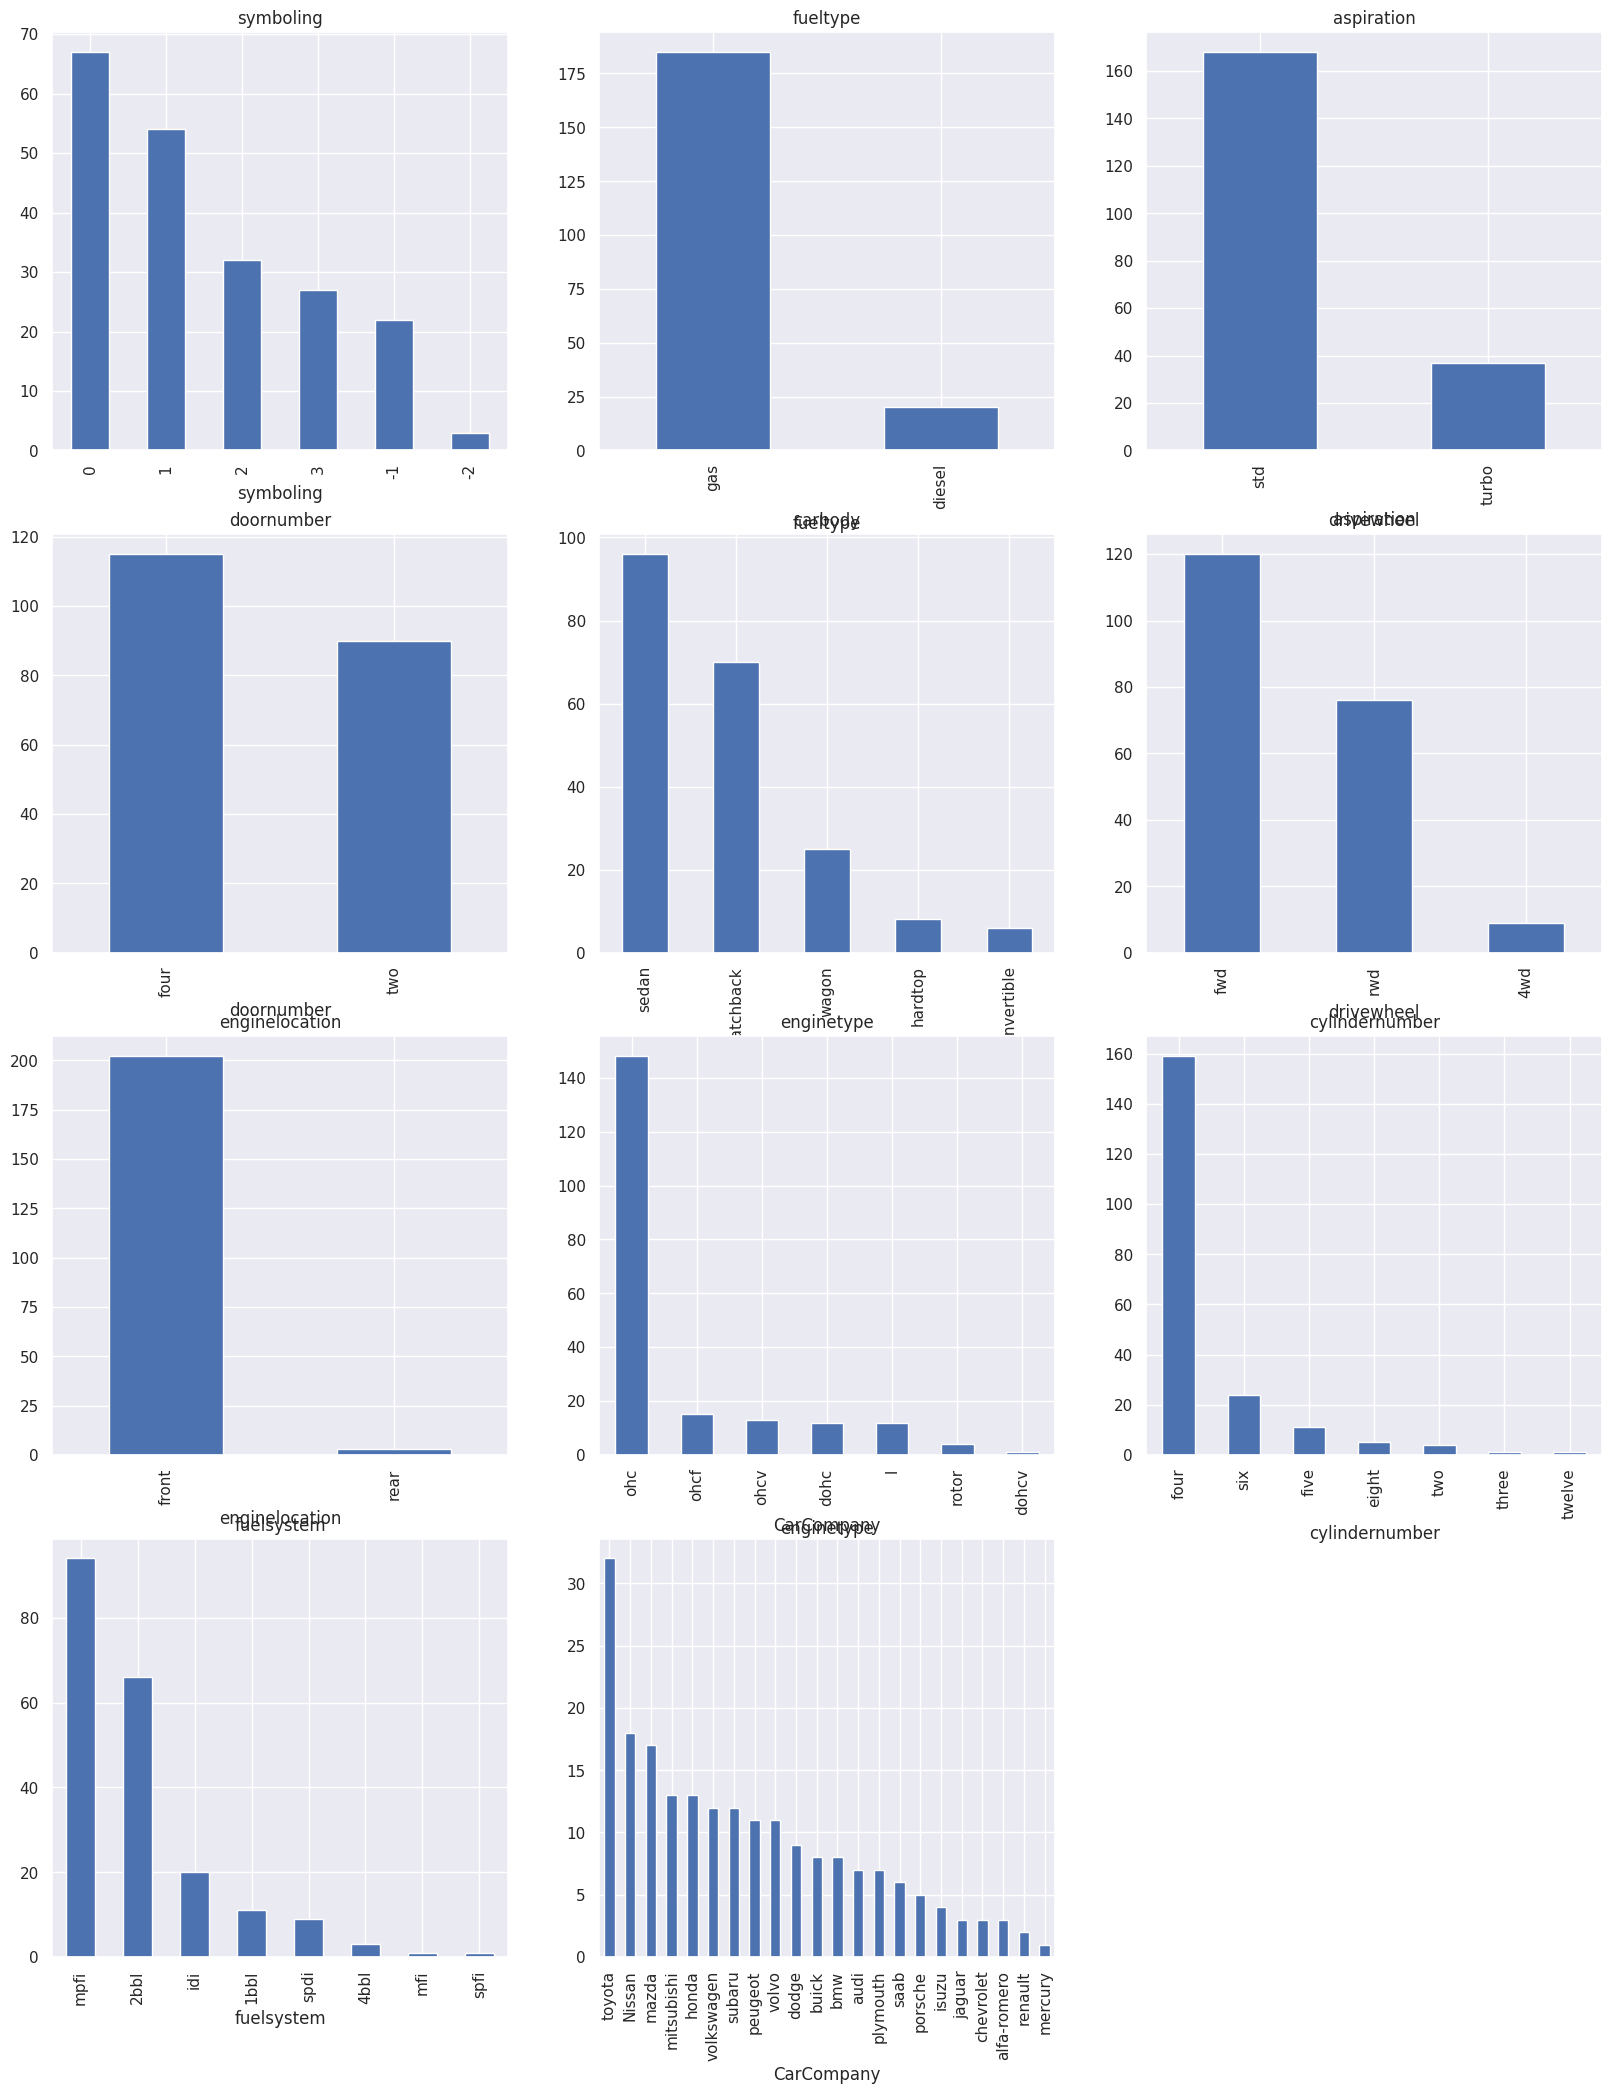

In [ ]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
           'cylindernumber','fuelsystem','CarCompany']

k=0
plt.figure(figsize=(20,25))
for col in col_category:
    k=k+1
    plt.subplot(4, 3,k)
    df[col].value_counts().plot(kind='bar');
    plt.title(col)

***Observations***

We can see that there is data imbalance in below columns:-
1. `symboling` - There are very few with rating -2.
2. `fuletype` - All the cars fule type is Gas, as Diesel cars were removed while removing outliers..
3. `aspiration` - Lesser number of turbo than std.
4. `engineloaction` - All the engine location is in front, as all the rear engine cars were removed while removing outliers.
5. `enginetype` - Considerably more number of ohc than others.
6. `cylindernumber` - Large number of four cyliners than others.
7. `fulesystem` - mpfi and 2bbl fulesystem cars are more comparitavely others.
8. `CarCompany` - Most of the Toyata company cars were surveyed.

# 4. Data visualization

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(column_name , hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage
    """
    sns.set_palette("Paired")
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [ ]:
# create function that visualized numeric columns using box plot

def box_plot(column_name):
    """
    input : column name, column data type must be numeric
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(y = column_name, data = df)
    plt.xlabel(column_name)
    plt.ylabel("FRQ")
    plt.show()

## Phân tích các features

Cột **symboling**

In [ ]:
# see unique values

df["symboling"].unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


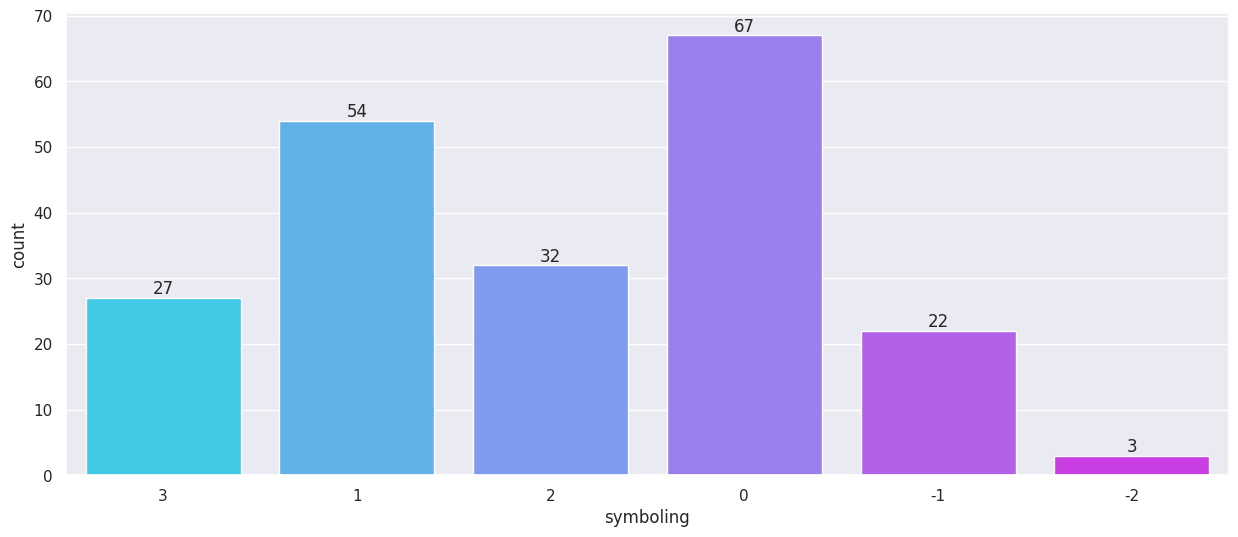

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "symboling")

I'm not sure what this column means, but let me move forward in the analysis and through that I will decide whether it is useful or not.


Cột **CarCompany**

In [ ]:
# see number of unique value

df["CarCompany"].nunique()

22

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


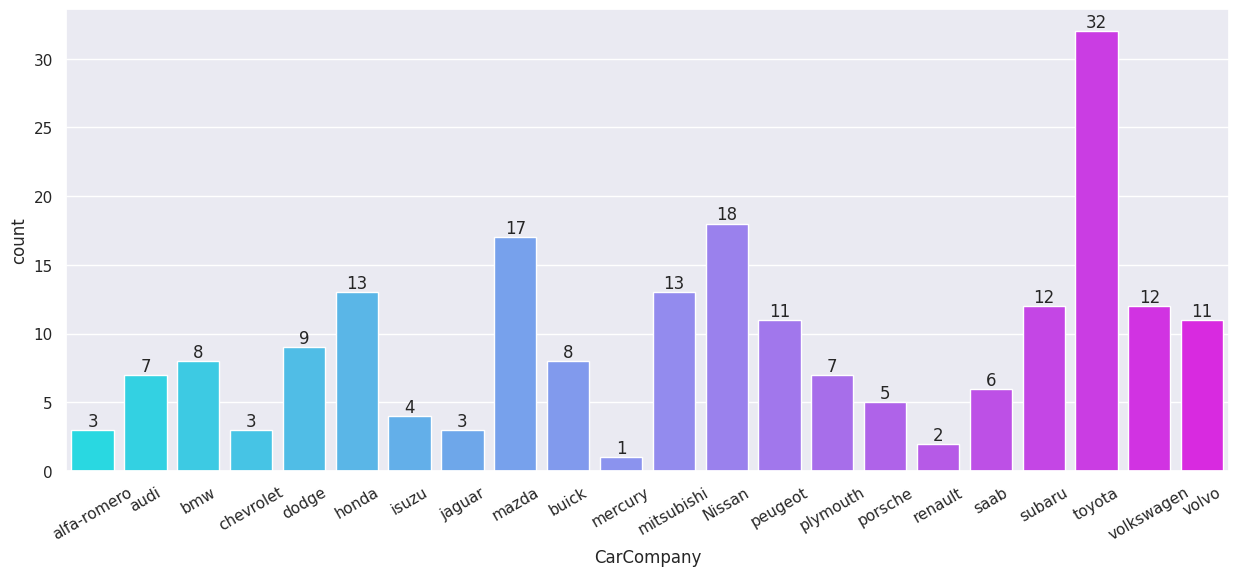

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "CarCompany", rotation = 30)
plt.show()

Toyota is the most favoried car and Mercury is the least

Cột **fueltype**

In [ ]:
# see unique values

df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

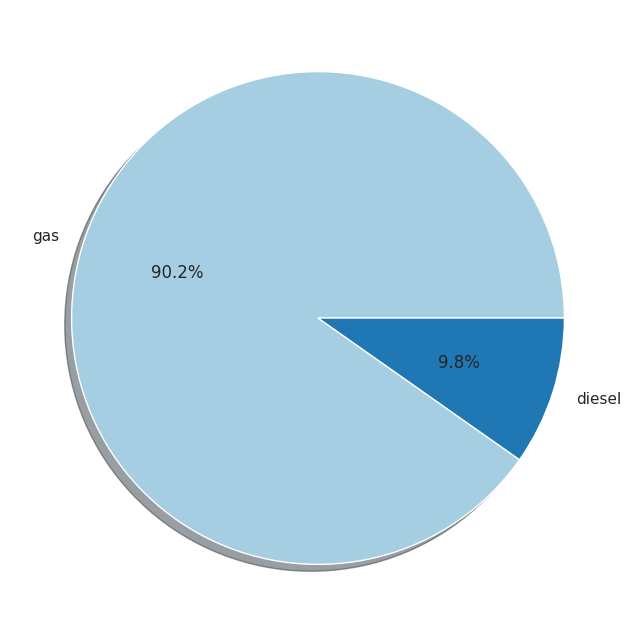

In [ ]:
# number of unique values is small, which is appropriate with pie plot
pie_plot("fueltype") # call function i create it in cell 12

Most fuel type is Gas

Cột **aspiration**

In [ ]:
# see unique values

df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

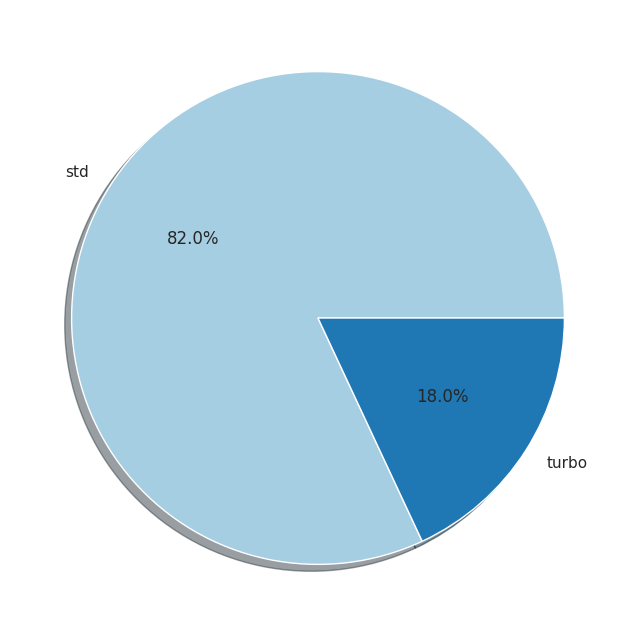

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("aspiration") # call function i create it in cell 12

Most cars supplying air to the engine using naturally aspirated.

Cột **doornumber**

In [ ]:
# see unique value

df["doornumber"].unique()

array(['two', 'four'], dtype=object)

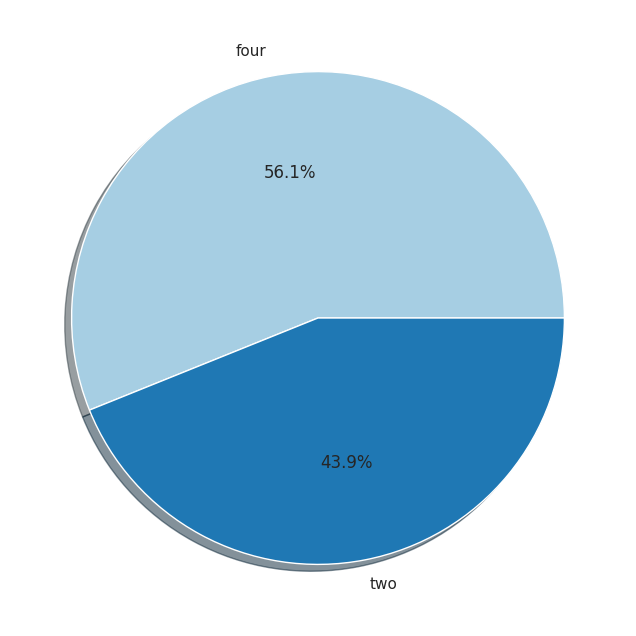

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("doornumber") # call function i create it in cell 12

Most cars have four doors

Cột **carbody**

In [ ]:
# see unique values

df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


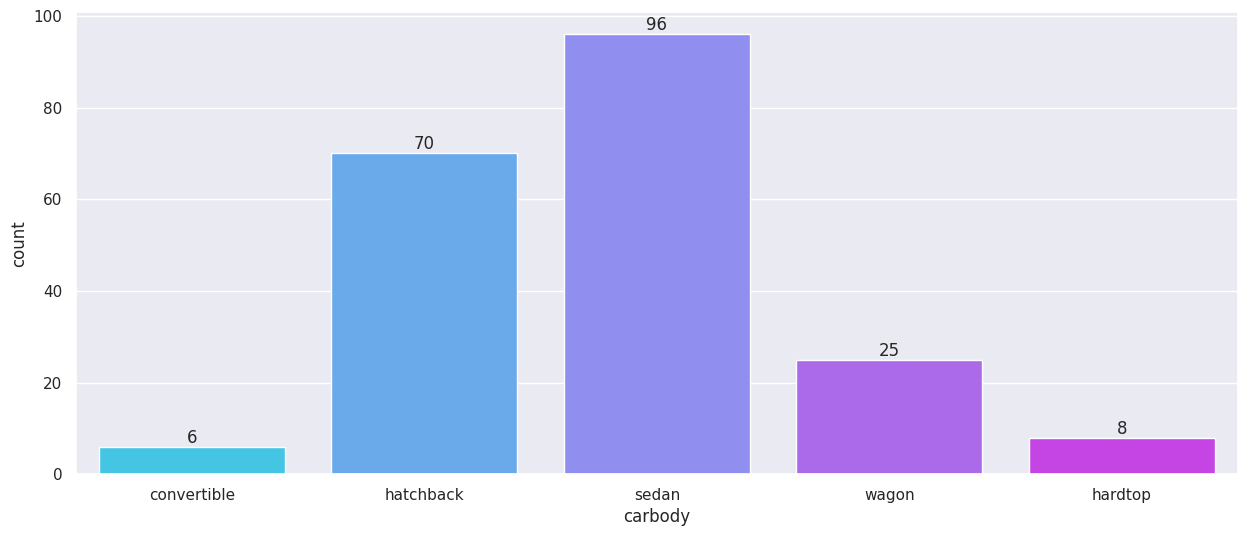

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "carbody")

Most Cars is sedan

Cột **drivewheel**

In [ ]:
# see unique values

df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

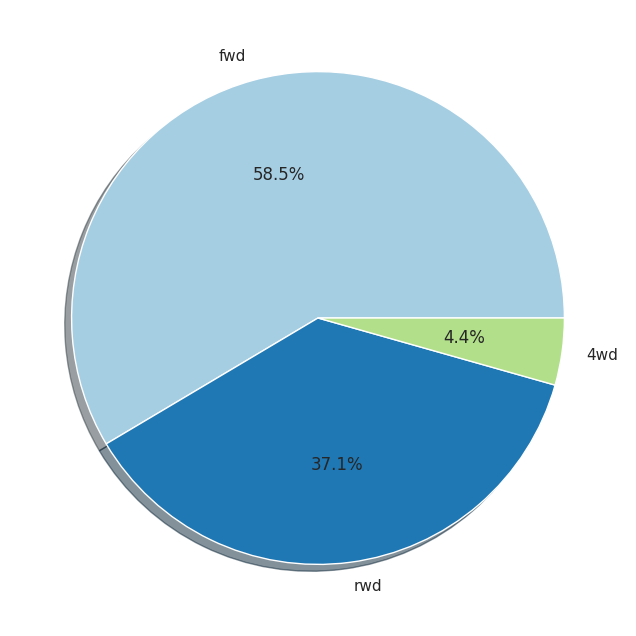

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("drivewheel") # call function i create it in cell 12

Most cars with front-wheel drive

Cột **enginelocation**

In [ ]:
# see unique values

df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

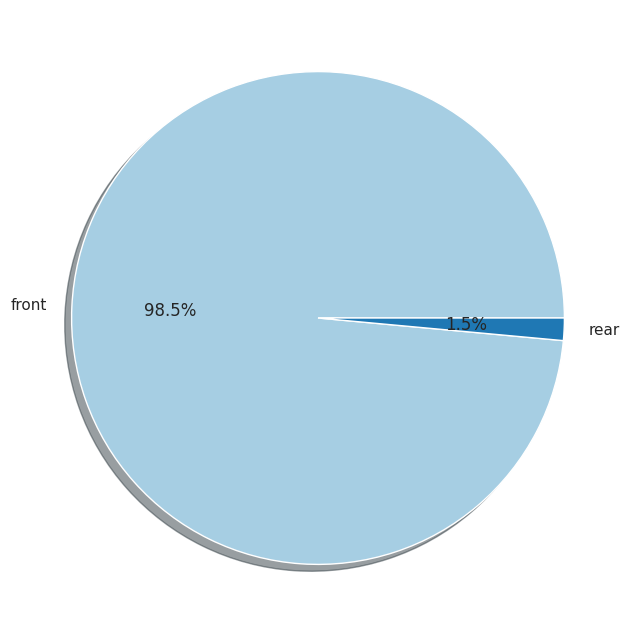

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("enginelocation") # call function i create it in cell 12

Cột **wheelbase**

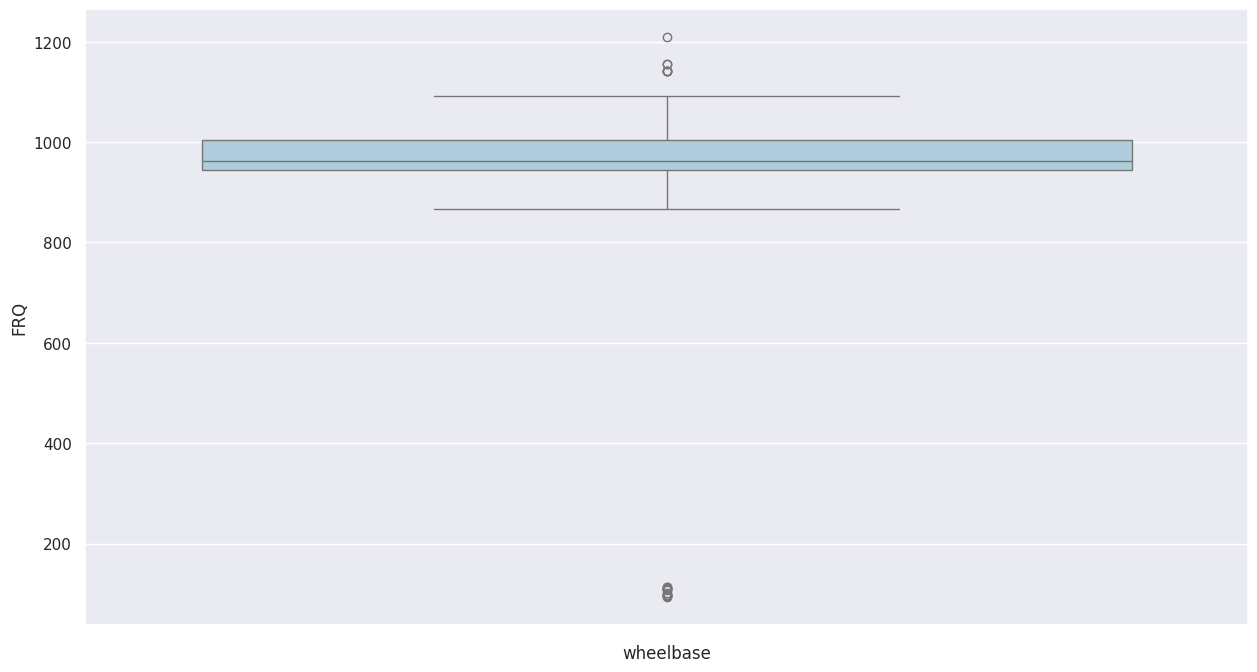

In [ ]:
# see distribution

box_plot("wheelbase") # call function i create it in cell 13

We can see
most cars has A medium wheelbase
avrage distance between the centers of the front and rear wheels is 98 cm

Cột **carlength**

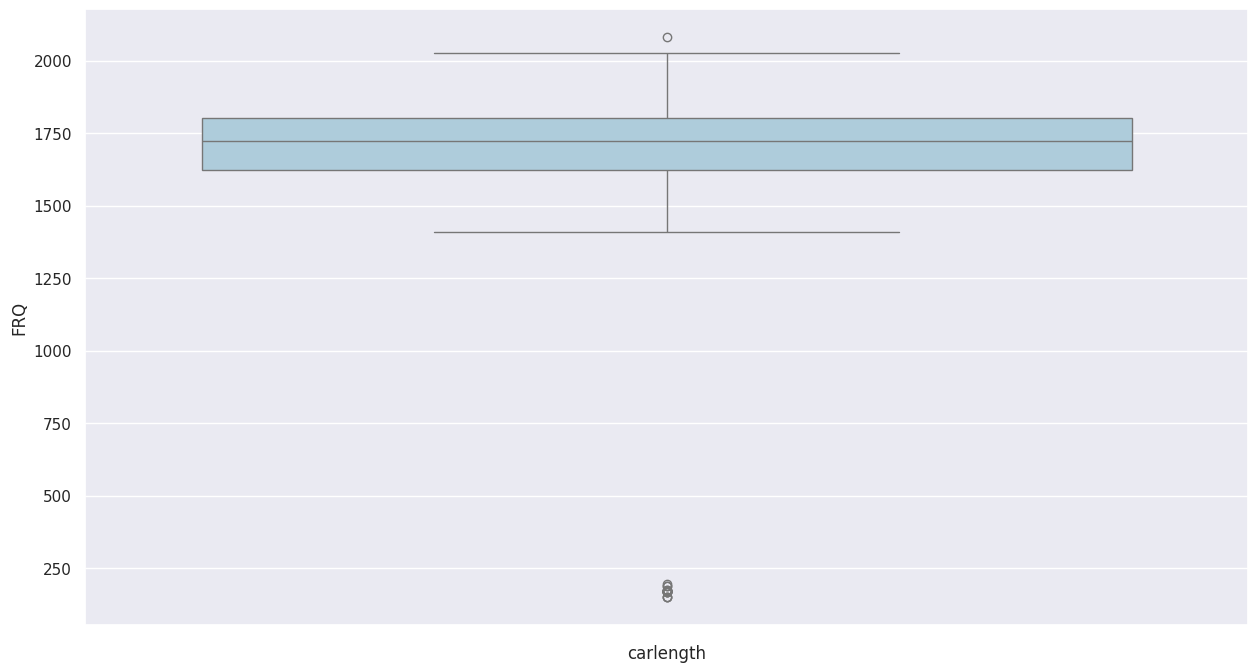

In [ ]:
# see distribution

box_plot("carlength") # call function i create it in cell 13

Avrege of cars length is 174

Cột **carheight**

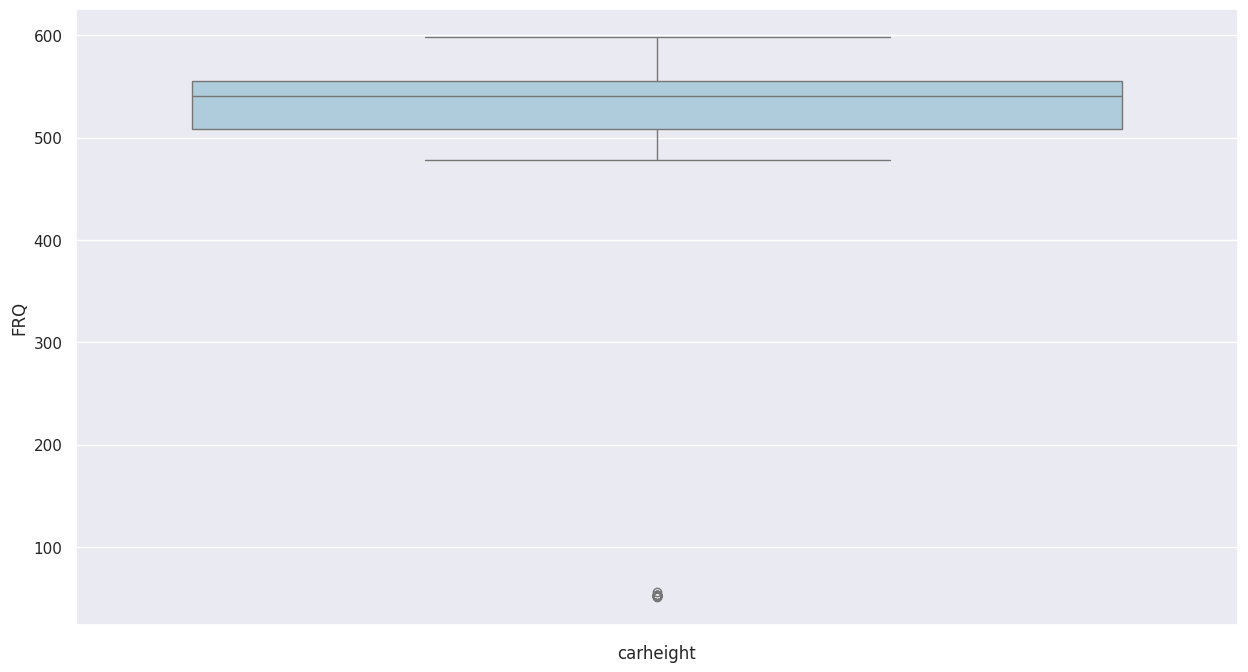

In [ ]:
# see distribution

box_plot("carheight") # call function i create it in cell 13

Cột **curbweight**

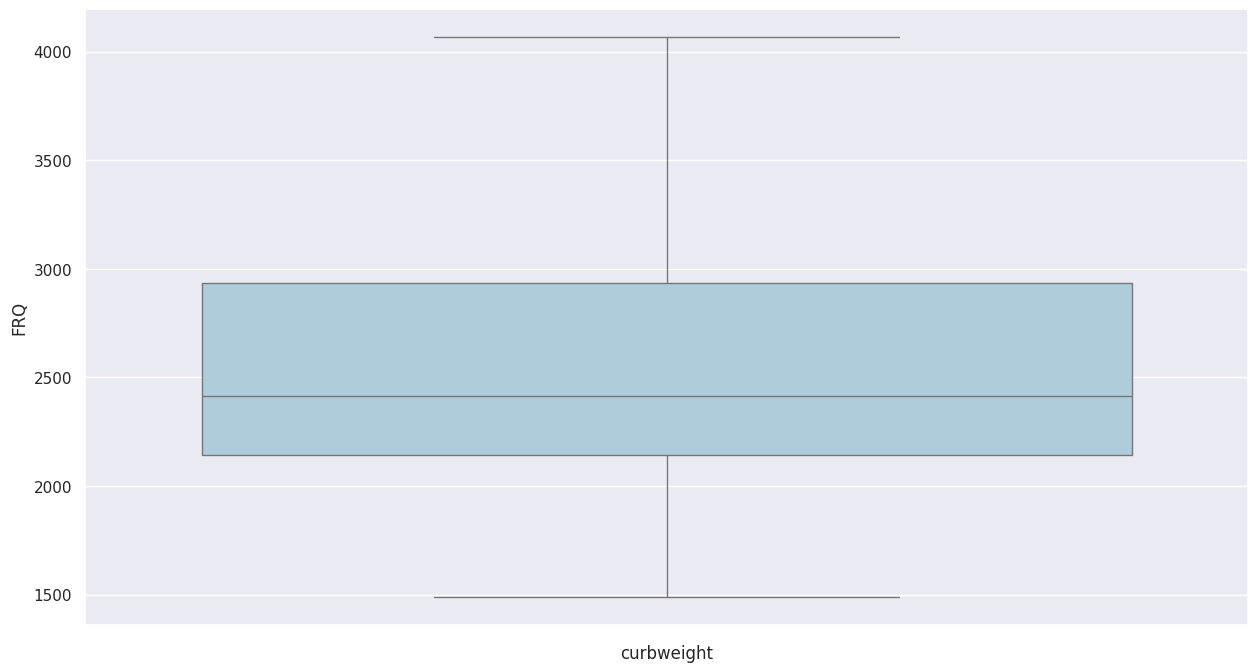

In [ ]:
# see distribution

box_plot("curbweight") # call function i create it in cell 13

Cột **enginetype**

In [ ]:
# see unique values

df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


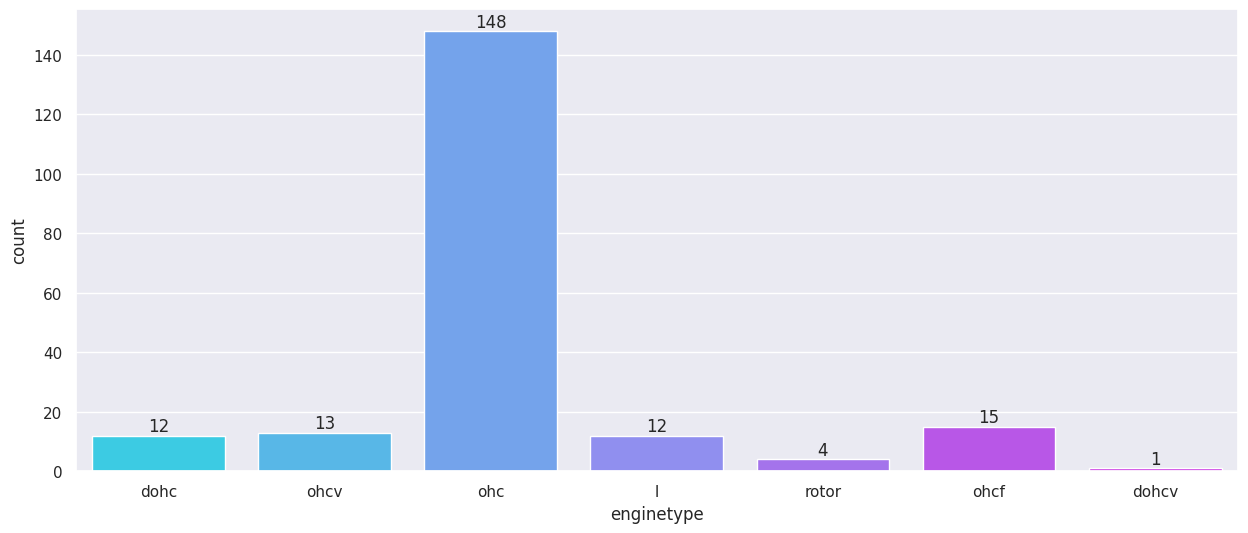

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "enginetype")

Most cars have type of engine "Over Head Cam"

 Cột **cylindernumber**

In [ ]:
# see unique values

df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


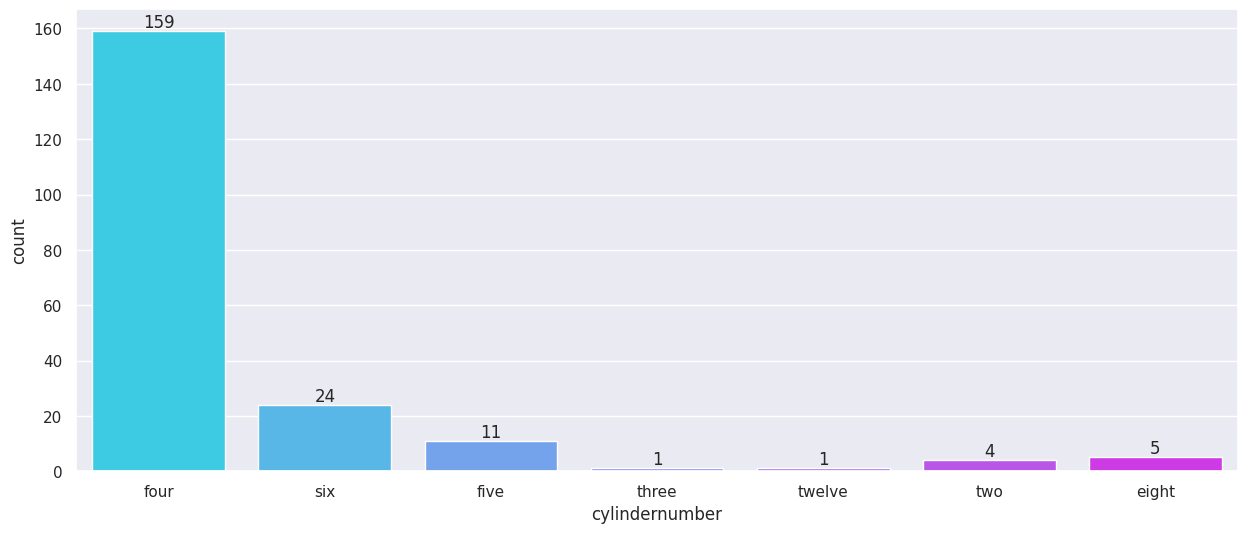

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "cylindernumber")

Most cars have 4 Cylinders in the Engine

Cột **fuelsystem**

In [ ]:
# see unique values

df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

<ipython-input-90-4c5ca661b303>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = df, hue = hue, palette="cool")


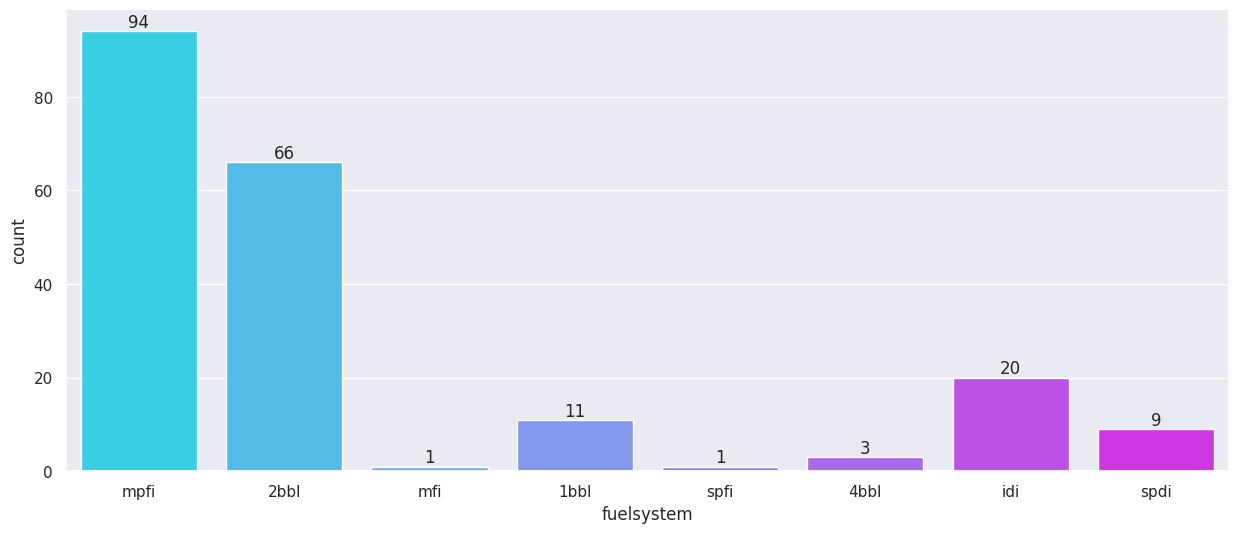

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
count_plot(column_name = "fuelsystem")

Most cars used "Multi Point Fuel Injection"

Cột **boreratio**

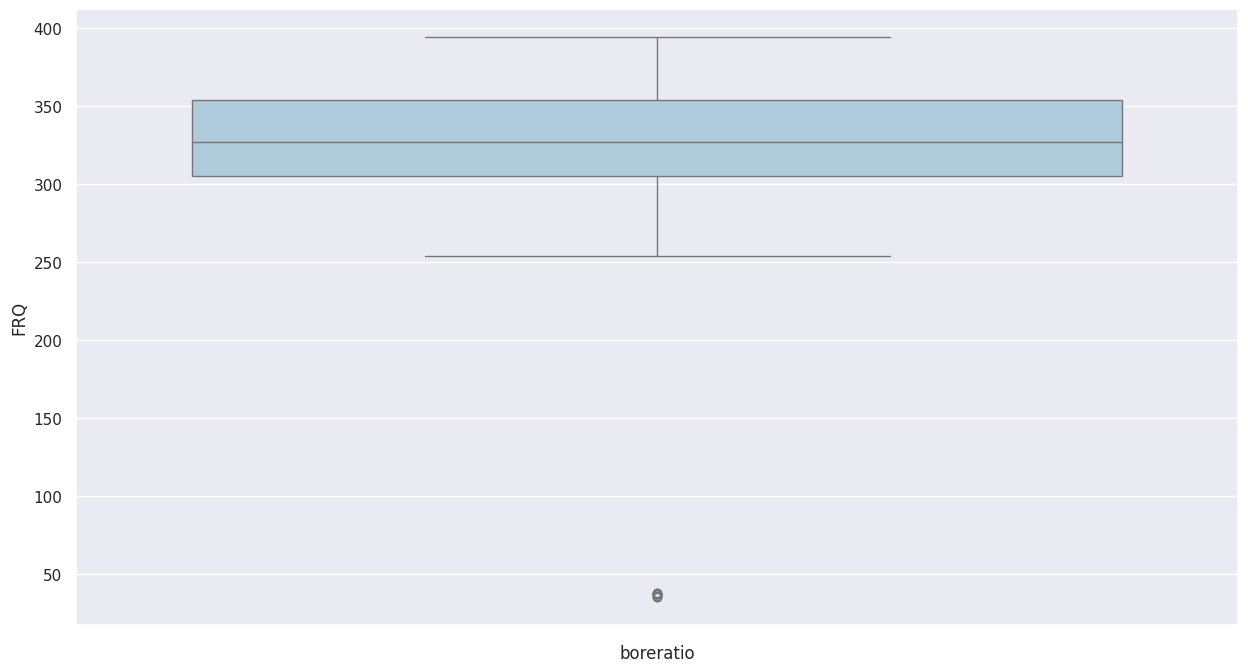

In [ ]:
# see distribution

box_plot("boreratio") # call function i create it in cell 13

* Avrage of boreratio is 3.3 cm
* The Bore-to-Stroke Ratio is the ratio between the diameter of the engine cylinder bore and the length of the piston stroke. It is an important factor that determines an engine’s power and torque characteristics

Cột **price**

<ipython-input-120-1abb5da405ff>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


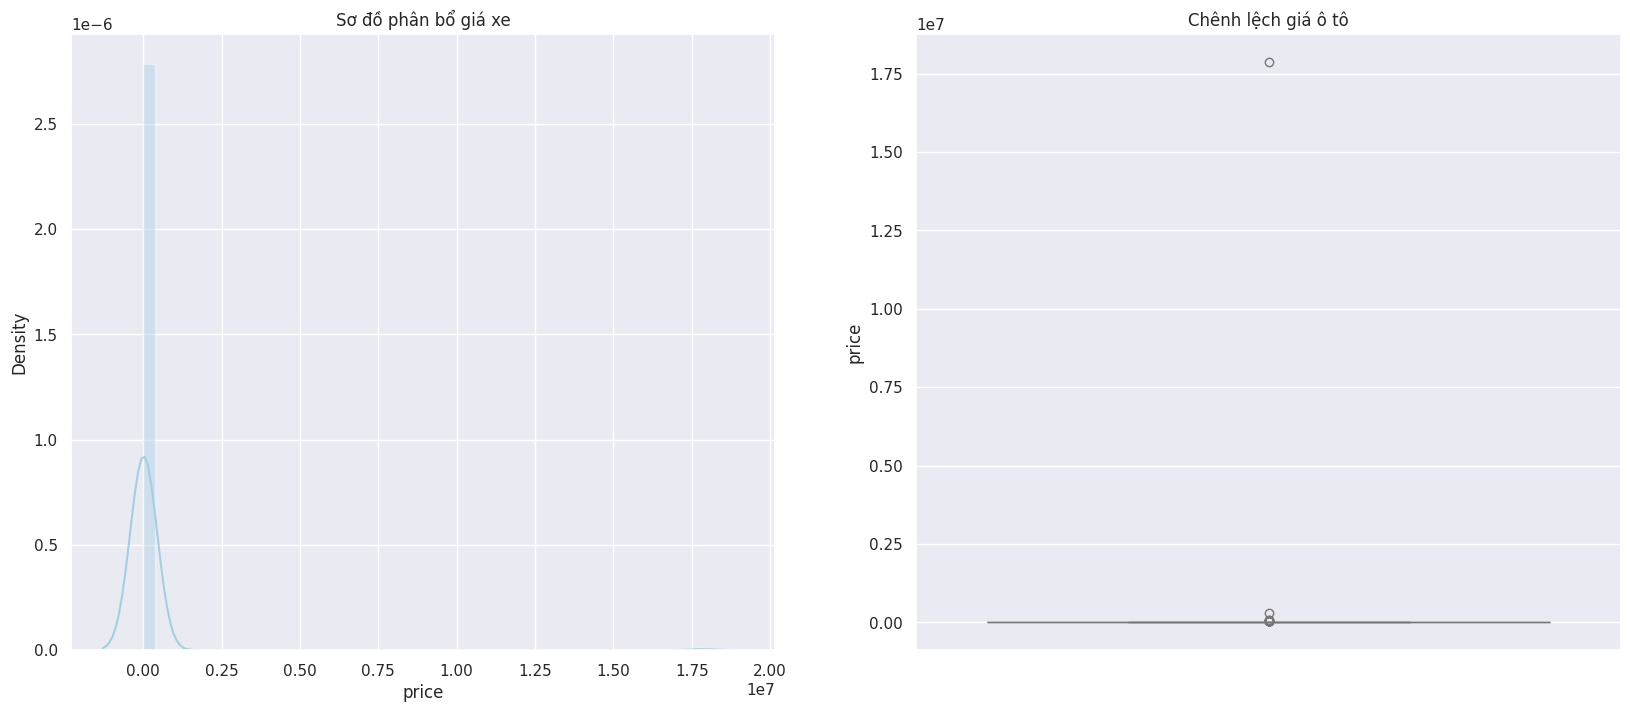

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sơ đồ phân bổ giá xe')
sns.distplot(df['price'])

plt.subplot(1,2,2)
plt.title('Chênh lệch giá ô tô')
sns.boxplot(y=df['price'])

plt.show()

**Handling outliers**

In [ ]:
def iqr_outliers(df, column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr = q3 - q1
  range_low = q1 - 1.5 * iqr
  range_high = q3 + 1.5 * iqr
  return df.loc[(df[column_name] > range_low) & (df[column_name] < range_high)]


In [ ]:
df=iqr_outliers(df,'price')

<ipython-input-123-1abb5da405ff>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


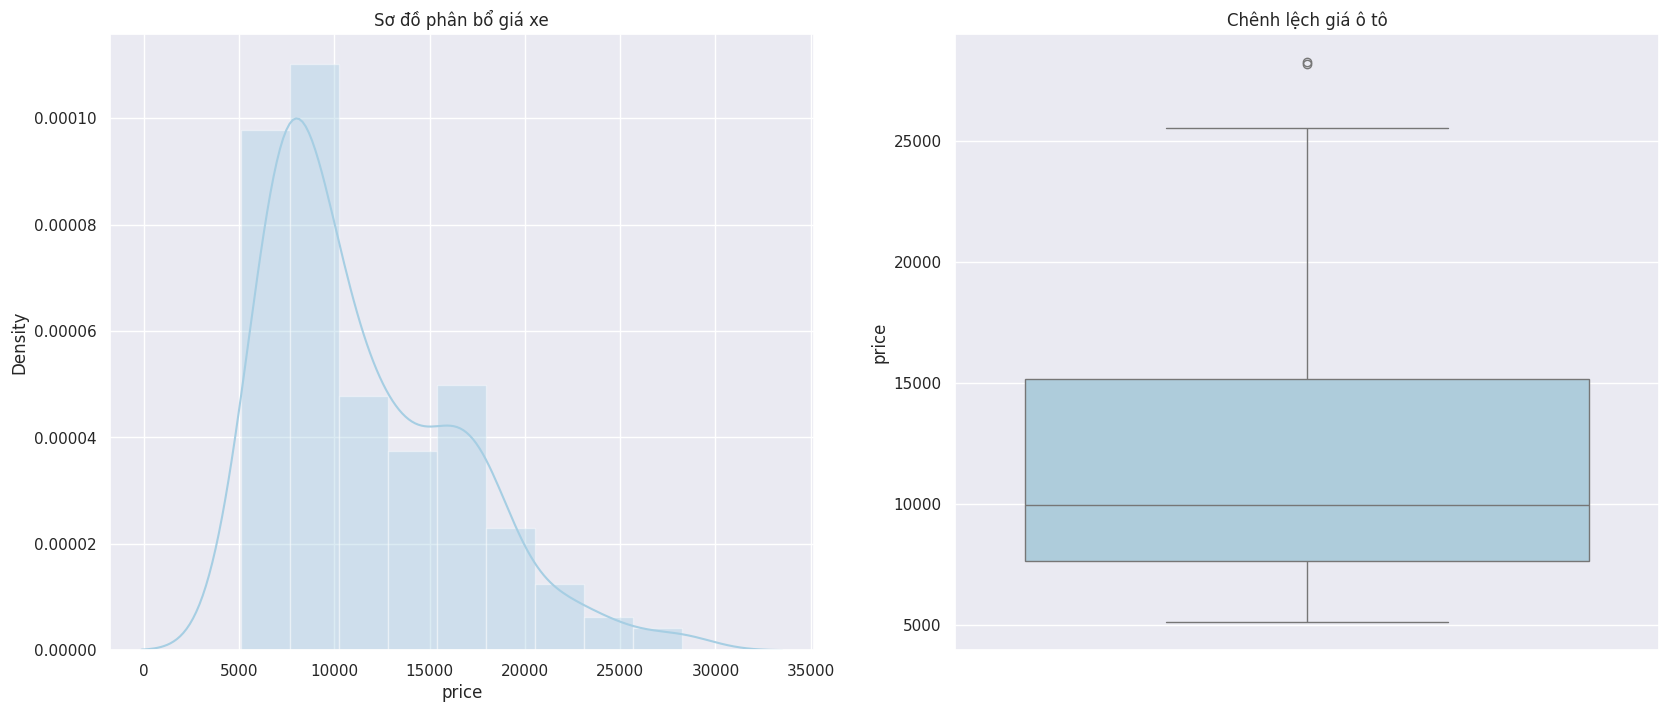

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sơ đồ phân bổ giá xe')
sns.distplot(df['price'])

plt.subplot(1,2,2)
plt.title('Chênh lệch giá ô tô')
sns.boxplot(y=df['price'])

plt.show()

In [ ]:
df.shape

(187, 25)

Chúng ta có thể thấy rằng có (205 - 187)=28 bản ghi trong cột price là các giá trị outliers trong tập dữ liệu.

## Bivariate Analysis & Visualizations

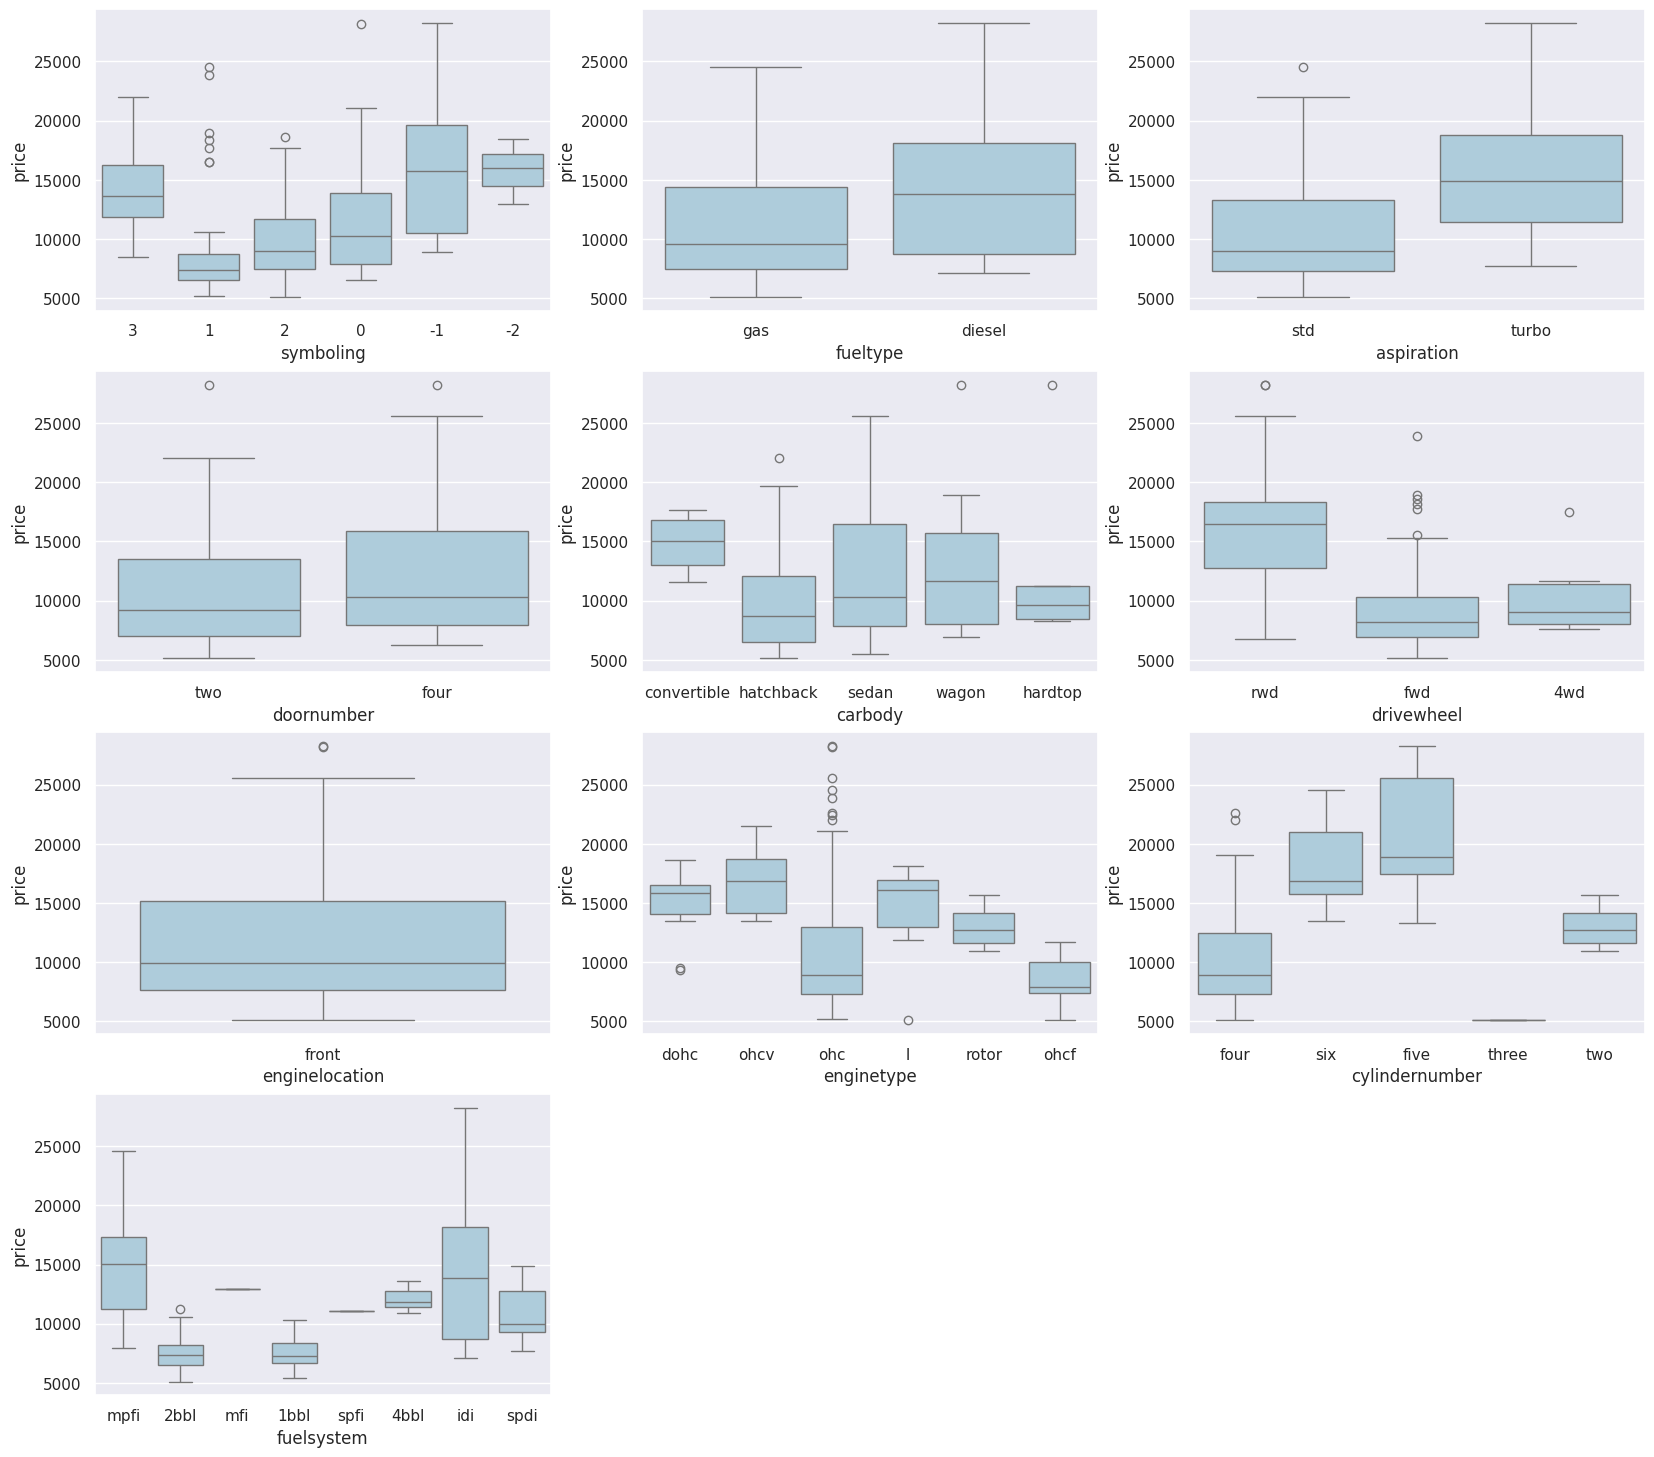

In [ ]:
# Boxplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):
    k=k+1
    plt.subplot(4, 3, k)
    ax = sns.boxplot(x = col_category[col], y = 'price', data = df)

<ipython-input-126-84239b6b0179>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


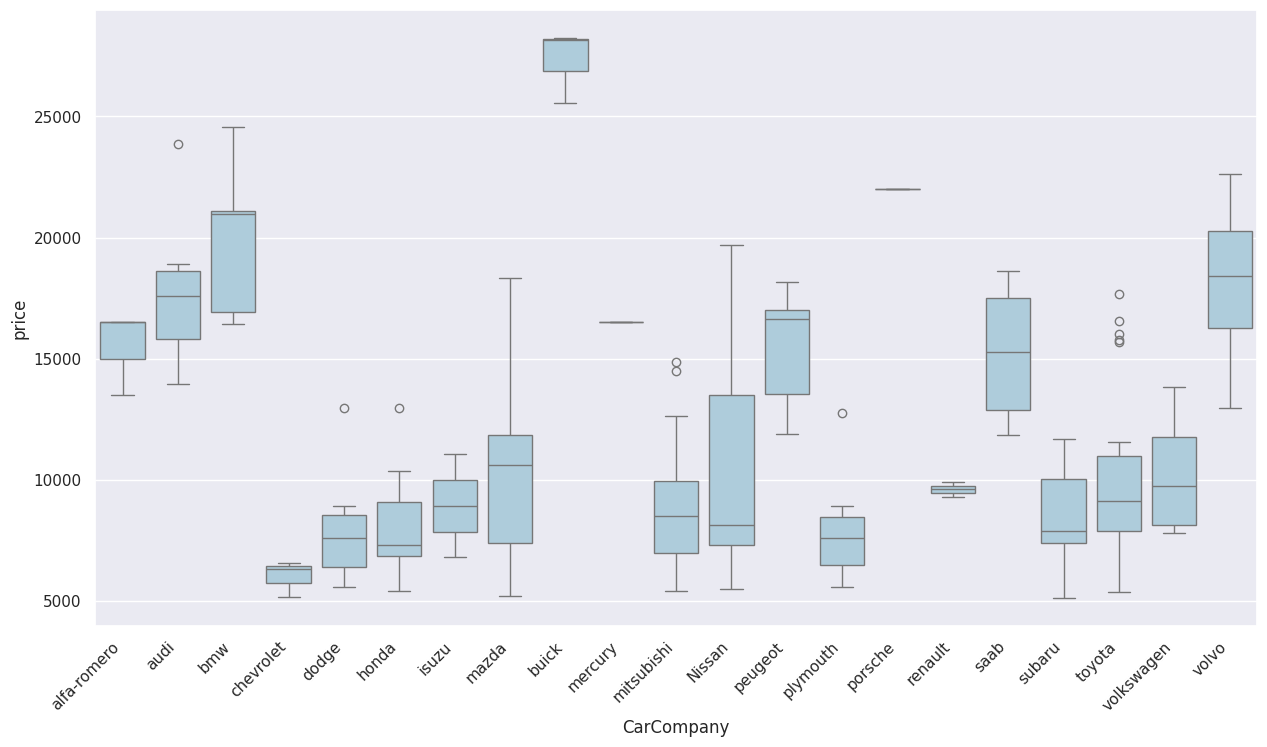

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'CarCompany', y = 'price', data = df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

- Diesel cars are more expensive than petrol cars.
- All the types of car bodies are relatively cheaper as compared to convertible car bodies.
- Cars with rear engine locations are way more expensive than cars with front engine locations.
- The price of the car is directly proportional to the number of cylinders in most cases.
- DoorNumber isn't affecting the price much.

***Observations***

1. `CarCompany` - Porsche has very high median price compared to other cars,though the number of Porsche cars is very less. Volvo, alfa-romero, audi and BMW are also high median price than others. Saab has wide rage of price, with high median price.
2. `aspiration` - std has lower median than turbo.
3. `carbody` - convertible has higher median that others.
4. `symboling` - -2 and -1 have higher median price than others.
5. `enginelocation` - rear has very high median price than fromt.
6. `cylindernumber` - Four has lower median than others.
7. `fulesystem` - 1bbl and 2bbl have lower median price than others.

## Visualization of Numeric Variables


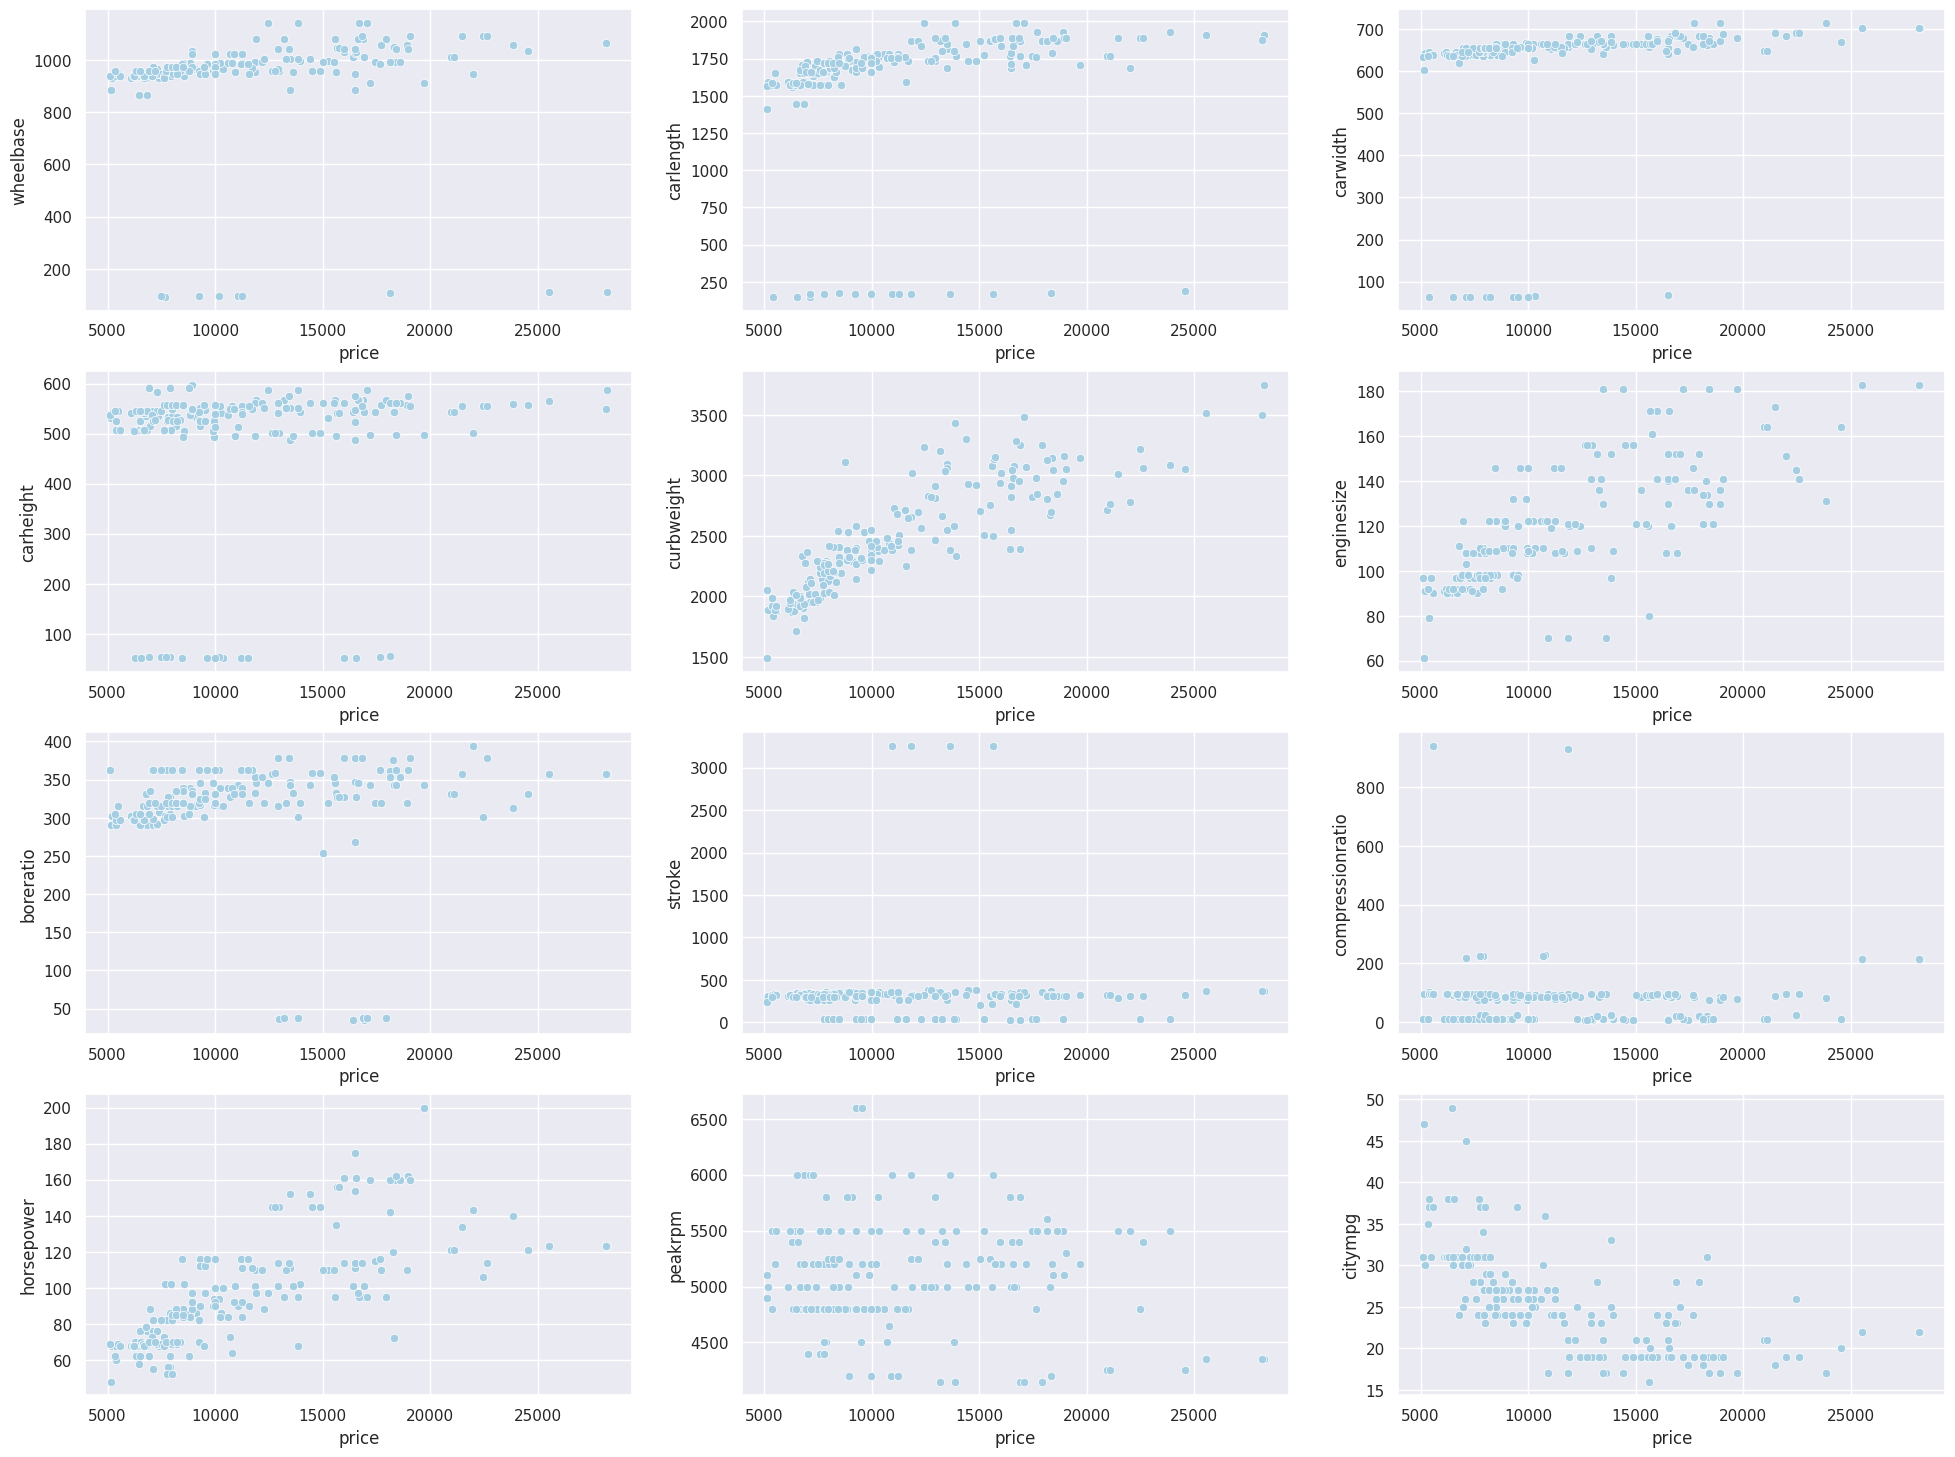

In [ ]:
fig, axes = plt.subplots(4,3 , figsize=(24,18))
axes = axes.flatten()
features = df_num.columns[:-2]
for i in range(len(features)):
    sns.scatterplot(data=df, x="price",y=features[i],ax=axes[i])

<Axes: xlabel='price', ylabel='highwaympg'>

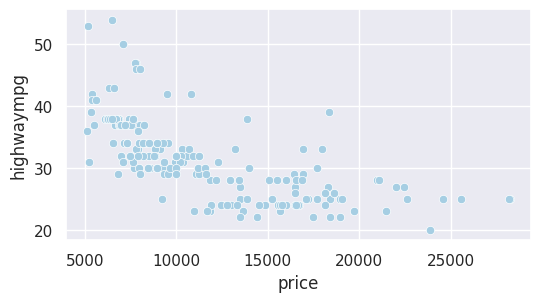

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x="price",y=df_num.columns[-2])

We can see that :

- carwidth , carlength, curbweight ,enginesize and horsepowerseems have a poitive correlation with price.
- carheight don't have any correlation with price.

## Correlation

sử dụng hàm corr() để tính toán mối tương quan theo cặp của tất cả các biến số trong tập dữ liệu của mình.

In [ ]:
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

* wheelbase has a high positive correlation with carlength,carwidth and curbweight
* carlength has a high positive correlation with curbweight
* carlength has a negative correlation with highwaympg
* carwidth has a high positive correlation with curbweight and engine size
* enginesize has a high positive correlation with horsepower
* curbweight has a high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has a negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated

# Data Preprocessing

## Scaling the Numerical Variables

In [ ]:
# chỉ chọn các cột số mong muốn từ khung dữ liệu mà chúng tôi muốn chia tỷ lệ
scale_col = [['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
# for loop to apply log transformation
for column in scale_col:
    # apply log transformation and save it in the same dataframe
    df[column] = np.log(df[column])
df.sample(20)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
185,2,volkswagen,gas,std,four,sedan,fwd,front,6.880384,7.448334,...,4.691348,mpfi,5.765191,3.526361,2.197225,4.442651,8.565983,3.295837,3.526361,9.011279
168,2,toyota,gas,std,two,hardtop,rwd,front,6.891626,7.474205,...,4.983607,mpfi,5.891644,3.555348,4.532599,4.753590,8.476371,3.178054,3.401197,9.173573
173,-1,toyota,gas,std,four,sedan,fwd,front,6.931472,7.470794,...,4.804021,mpfi,5.802118,5.869297,4.465908,4.521789,8.342840,3.367296,3.526361,9.099185
157,0,toyota,gas,std,four,hatchback,fwd,front,6.863803,7.416378,...,4.584967,2bbl,5.765191,5.713733,2.197225,4.248495,8.476371,3.401197,3.610918,8.881558
107,0,peugeot,gas,std,four,sedan,rwd,front,6.983790,7.532088,...,4.787492,mpfi,5.846439,5.765191,4.430817,4.574711,8.517193,2.944439,3.178054,9.384294
39,0,honda,gas,std,four,sedan,fwd,front,6.872128,7.469654,...,4.700480,1bbl,5.752573,5.880533,2.197225,4.454347,8.665613,3.295837,3.496508,9.087608
4,2,audi,gas,std,four,sedan,4wd,front,6.901737,7.476472,...,4.912655,mpfi,5.765191,3.526361,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095
100,0,Nissan,gas,std,four,sedan,fwd,front,6.879356,7.458186,...,4.787492,2bbl,5.808142,5.849325,4.442651,4.574711,8.556414,3.295837,3.526361,9.164192
58,3,mazda,gas,std,two,hatchback,rwd,front,6.859615,5.129899,...,4.382027,mpfi,5.808142,8.087948,4.543295,4.905275,8.699515,2.772589,3.135494,9.657907
75,1,mercury,gas,turbo,two,hatchback,rwd,front,6.934397,7.486613,...,4.941642,mpfi,5.934894,5.743003,2.079442,5.164786,8.517193,2.944439,3.178054,9.711297


from matplotlib import pyplot as plt
_df_0['wheelbase'].plot(kind='hist', bins=20, title='wheelbase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['carlength'].plot(kind='hist', bins=20, title='carlength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['carwidth'].plot(kind='hist', bins=20, title='carwidth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['carheight'].plot(kind='hist', bins=20, title='carheight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('symboling').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('fueltype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('aspiration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('doornumber').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='wheelbase', y='carlength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='carlength', y='carwidth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='carwidth', y='carheight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='carheight', y='curbweight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['wheelbase'].plot(kind='line', figsize=(8, 4), title='wheelbase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['carlength'].plot(kind='line', figsize=(8, 4), title='carlength')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['carwidth'].plot(kind='line', figsize=(8, 4), title='carwidth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['carheight'].plot(kind='line', figsize=(8, 4), title='carheight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['fueltype'].value_counts()
    for x_label, grp in _df_16.groupby('symboling')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('symboling')
_ = plt.ylabel('fueltype')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['aspiration'].value_counts()
    for x_label, grp in _df_17.groupby('fueltype')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('fueltype')
_ = plt.ylabel('aspiration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['doornumber'].value_counts()
    for x_label, grp in _df_18.groupby('aspiration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('aspiration')
_ = plt.ylabel('doornumber')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['carbody'].value_counts()
    for x_label, grp in _df_19.groupby('doornumber')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('doornumber')
_ = plt.ylabel('carbody')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['symboling'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='wheelbase', y='symboling', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['fueltype'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='wheelbase', y='fueltype', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['aspiration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='wheelbase', y='aspiration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['doornumber'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='wheelbase', y='doornumber', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,6.786717,7.431300,...,4.867534,mpfi,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075
1,3,alfa-romero,gas,std,two,convertible,rwd,front,6.786717,7.431300,...,4.867534,mpfi,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,6.851185,7.445418,...,5.023881,mpfi,5.590987,5.849325,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,6.905753,7.476472,...,4.691348,mpfi,5.765191,3.526361,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,6.901737,7.476472,...,4.912655,mpfi,5.765191,3.526361,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,6.994850,7.543273,...,4.948760,mpfi,5.934894,5.752573,4.553877,4.736198,8.594154,3.135494,3.332205,9.731809
201,-1,volvo,gas,turbo,four,sedan,rwd,front,6.994850,7.543273,...,4.948760,mpfi,5.934894,5.752573,4.465908,5.075174,8.575462,2.944439,3.218876,9.854560
202,-1,volvo,gas,std,four,sedan,rwd,front,6.994850,7.543273,...,5.153292,mpfi,5.880533,5.659482,4.477337,4.897840,8.612503,2.890372,3.135494,9.975110
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,6.994850,7.543273,...,4.976734,idi,5.707110,3.526361,3.135494,4.663439,8.476371,3.258097,3.295837,10.019936


## Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem','CarCompany']
for x in cat:
    encoder = LabelEncoder()
    df[x]= encoder.fit_transform(df[x])
df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,1,0,2,0,6.786717,7.431300,...,4.867534,5,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075
1,3,1,1,0,1,0,2,0,6.786717,7.431300,...,4.867534,5,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116
2,1,1,1,0,1,2,2,0,6.851185,7.445418,...,5.023881,5,5.590987,5.849325,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116
3,2,2,1,0,0,3,1,0,6.905753,7.476472,...,4.691348,5,5.765191,3.526361,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235
4,2,2,1,0,0,3,0,0,6.901737,7.476472,...,4.912655,5,5.765191,3.526361,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095


## Splitting Data

In [ ]:
X = df.drop("price",axis=1)
y = df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
X

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,1,0,1,0,2,0,6.786717,7.431300,...,1,4.867534,5,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837
1,3,1,1,0,1,0,2,0,6.786717,7.431300,...,1,4.867534,5,5.849325,5.590987,2.197225,4.709530,8.517193,3.044522,3.295837
2,1,1,1,0,1,2,2,0,6.851185,7.445418,...,2,5.023881,5,5.590987,5.849325,2.197225,5.036953,8.517193,2.944439,3.258097
3,2,2,1,0,0,3,1,0,6.905753,7.476472,...,1,4.691348,5,5.765191,3.526361,2.302585,4.624973,8.612503,3.178054,3.401197
4,2,2,1,0,0,3,0,0,6.901737,7.476472,...,0,4.912655,5,5.765191,3.526361,2.079442,4.744932,8.612503,2.890372,3.091042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,20,1,0,0,3,2,0,6.994850,7.543273,...,1,4.948760,5,5.934894,5.752573,4.553877,4.736198,8.594154,3.135494,3.332205
201,-1,20,1,1,0,3,2,0,6.994850,7.543273,...,1,4.948760,5,5.934894,5.752573,4.465908,5.075174,8.575462,2.944439,3.218876
202,-1,20,1,0,0,3,2,0,6.994850,7.543273,...,2,5.153292,5,5.880533,5.659482,4.477337,4.897840,8.612503,2.890372,3.135494
203,-1,20,0,1,0,3,2,0,6.994850,7.543273,...,2,4.976734,3,5.707110,3.526361,3.135494,4.663439,8.476371,3.258097,3.295837


## Building Models

### Linear Regression


### Decision Tree

### Random Forest

### KNeighbors Regressor


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]


lg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

models = [lg,dt,rf,knn]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))

model_names = ['Linear Regression','Decision Tree','Random Forest','KNeighbors Regressor']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

,RMSE,R2_Test
Linear Regression,0.14,0.85
Decision Tree,0.12,0.89
Random Forest,0.13,0.87
KNeighbors Regressor,0.20,0.69
